# Gradient Descent

Gradient Descent is an optimization algorithm used to minimize the cost function in various machine learning models, including linear regression. In linear regression, the goal is to find the best-fitting line that minimizes the difference between the predicted values and the actual target values.

Let's consider a simple linear regression problem with one feature (variable) and the following equation for the linear model: $y=b + wx$

where:
* $y$ is the dependent variable (the variable being predicted)
* $x$ is the independent variable (the variable used to predict $y$)
* $b$ is the y-intercept (the value of $y$ when $x = 0$)
* $w$ is the slope of the line (the change in $y$ for a one-unit change in $x$)

The cost function for linear regression is often the Mean Squared Error (MSE) which is defined as:

$J(b,w) = \frac{1}{2m} \sum_i (y_i - (b + w x_i))^2$

where $m$ is the number of training examples, $y_i$ is the actual output for the i-th training example, and $f(x_i)$ is the predicted output for the i-th training example ($f(x_i) = b+wx_i$). The factor of $\frac{1}{2m}$ is included to simplify the calculation of the gradient during the optimization process.

The goal of gradient descent is to find the values of $b$ and $w$ that minimize the cost function. The algorithm works by iteratively updating the values of $b$ and $w$.

Here's the step-by-step explanation of the gradient descent algorithm for linear regression:

1. Initialize the values of $b$ and $w$ with random values or zeros.
1. Choose a learning rate $\alpha$, which is a hyperparameter determining the step size at each iteration.
1. Repeat the following until convergence (or a maximum number of iterations is reached):
    1. Compute the partial derivatives of the cost function with respect to $b$ and $w$:
    
        $\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_i (y_i - (b + w x_i))$
        
        $\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_i (y_i - (b + w x_i)) x_i $
        <br>
    
    1. Update the values of $b$ and $w$:
    
        $b = b - \alpha \frac{\partial J}{\partial b}$

        $w = w - \alpha \frac{\partial J}{\partial w}$
        <br>
 
1. Continue the iterations until the cost function converges to a minimum or a predefined tolerance level is reached.
1. The final values of $b$ and $w$ will be the optimal parameters for the linear regression model.

It's worth noting that the learning rate $\alpha$ is crucial for the convergence of the algorithm. If it's too small, the algorithm may take a long time to converge. On the other hand, if it's too large, the algorithm may oscillate and fail to find the minimum.

Gradient descent is a widely used optimization algorithm, but there are also variations like Stochastic Gradient Descent (SGD) and Mini-batch Gradient Descent that are used to speed up convergence and handle large datasets more efficiently.

In this lab, you learn how optimize $b$ and $w$ in linear regression using gradient descent algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

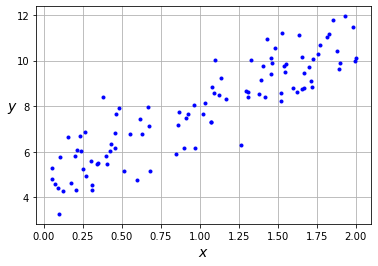

In [2]:
# Generate some random data
x = 2 * np.random.rand(100,1)  # generate 100 random numbers between 0 and 2
y = 5 + 3 * x + np.random.randn(100,1)

plt.plot(x,y,'b.')
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid()
plt.show()

In [3]:
def compute_gradient(x, y, b, w):
    """
    Computes the gradient for linear regression
    
    Args:
        x (ndarray): shape (m,) variable such as house size
        y (ndarray): shape (m,) target value
        b (scallar):            initial values of the parameter
        w (scallar):            initial values of the parameter
        
    Returns:
        dj_db (scallar): the gradient of the cost with respet to the parameter b
        dj_dw (scallar): the gradient of the cost with respet to the parameter w
    """
    m = len(x)
    dj_db = 0
    dj_dw = 0
    
    for i in range (m): # loop over examples
        f_i = b + w * x[i]             # calculate prediction for sample i
        dj_db_i = f_i - y[i]           # calculate partial derivative
        dj_dw_i = (f_i - y[i]) * x[i]  # calculate partial derivative
        
        dj_db = dj_db + dj_db_i      # add to total
        dj_dw = dj_dw + dj_dw_i      # add to total
        
    dj_db = 1/m * dj_db           # divide by number of examples
    dj_dw = 1/m * dj_dw           # divide by number of examples
       
    return dj_db, dj_dw

In [4]:
iteration = 5000
b = 0
w = 1
alpha = .01  # learning rate
e = 1e-6     # stopping threshold
m = len(x)   # number of data points

cost = np.zeros((iteration,1)) # initialize cost function values

t_history = np.zeros((iteration,2))
t_history[0,0] = b
t_history[0,1] = w

cost[0] = 1/2/m * sum((y - (b + w * x))**2)

for i in range(1,iteration):
    
    dj_db, dj_dw = compute_gradient(x, y, t_history[i-1,0], t_history[i-1,1])
        
    t_history[i,0] = t_history[i-1,0] - (alpha * dj_db)
    t_history[i,1] = t_history[i-1,1] - (alpha * dj_dw)
    
    cost[i] = 1/2/m * sum(((t_history[i,0] + t_history[i,1] * x) - y)**2)    
    
    if abs(cost[i] - cost[i-1]) <= e:
        print('number of iterations:', i)
        print('cost: %.4f' %cost[i][0])
        print('derivatives:')
        print('  dj_db = %.4f' %dj_db)
        print('  dj_dw = %.4f' %dj_dw)
        t_history = t_history[:i+1,:]
        b = t_history[i,0]
        w = t_history[i,1]
        break
    
print('coefficients:')
print('  b: %.4f' %b)
print('  w: %.4f' %w)

number of iterations: 2200
cost: 0.4424
derivatives:
  dj_db = -0.0077
  dj_dw = 0.0064
coefficients:
  b: 4.6863
  w: 3.1253


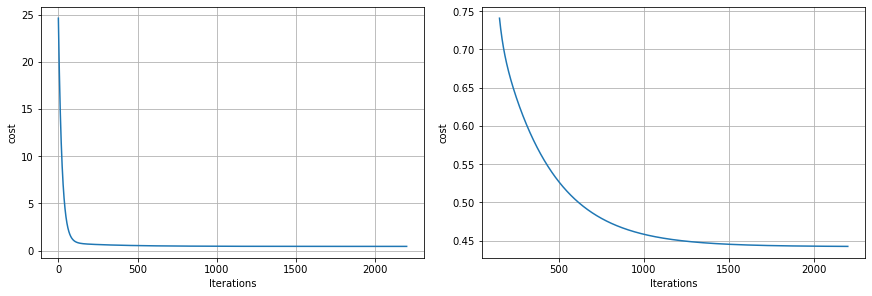

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), constrained_layout=True)

ax1.plot(np.arange(i),cost[:i])   # plot cost versus iteration
ax1.set_ylabel("cost")
ax1.set_xlabel("Iterations")
ax1.grid()

# plot cost versus iteration that does not include the initial iterations
ax2.plot(np.arange(150,i),cost[150:i])
ax2.set_ylabel("cost")
ax2.set_xlabel("Iterations")
ax2.grid()

In [6]:
# calculate cost for different b and w combinations to plot contour
b_vals = np.linspace(0,10,100)
w_vals = np.linspace(0,10,100)
J_vals = np.zeros((len(b_vals), len(w_vals)))

for i in range(len(b_vals)):
    for j in range(len(w_vals)):
        J_vals[i,j] = 1/2/m * sum(((b_vals[i] + w_vals[j] * x) - y)**2)

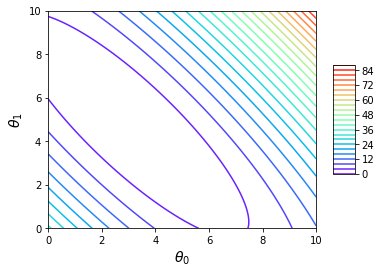

In [7]:
fig = plt.figure(figsize=(6, 4))
cont = plt.contour(b_vals, w_vals, J_vals, cmap=plt.cm.rainbow, levels = 25)
fig.colorbar(cont, shrink=0.5, aspect=5)
plt.xlabel("$\u03B8_0$", fontsize = 14)
plt.ylabel("$\u03B8_1$", fontsize = 14)

plt.show()

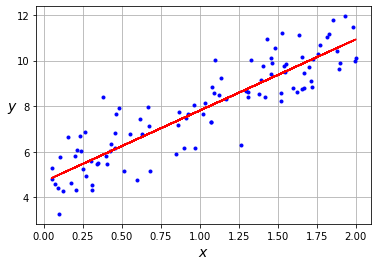

In [8]:
m = x.shape      # find the shape of x
f = np.zeros(m)  # initialize array f
for i in range(len(x)):
    f[i] = b + w * x[i]

plt.plot(x,y,'.b')                            # plot the points
plt.plot(x, f, c="r", label="Our prediction") # plot the line

plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid()
plt.show()